**Asthma catgeory : 1 - mild asthma , 2 - Moderate asthma , 3 - No Asthma**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("asthma_detection.csv")

In [ ]:
df.head(5)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Asthma
693,1,1,1,1,1,1,1,0,0,0,1,0,0,1,2
694,1,1,1,1,1,1,0,0,0,0,1,0,0,1,1
696,1,1,1,1,0,1,1,0,0,0,1,0,0,1,2
697,1,1,1,1,0,1,0,0,0,0,1,0,0,1,2
700,1,1,1,0,1,1,1,0,0,0,1,0,0,1,2


In [ ]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Asthma                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tiredness                3663 non-null   int64
 1   Dry-Cough                3663 non-null   int64
 2   Difficulty-in-Breathing  3663 non-null   int64
 3   Sore-Throat              3663 non-null   int64
 4   Pains                    3663 non-null   int64
 5   Nasal-Congestion         3663 non-null   int64
 6   Runny-Nose               3663 non-null   int64
 7   Age_0-9                  3663 non-null   int64
 8   Age_10-19                3663 non-null   int64
 9   Age_20-24                3663 non-null   int64
 10  Age_25-59                3663 non-null   int64
 11  Age_60+                  3663 non-null   int64
 12  Gender_Female            3663 non-null   int64
 13  Gender_Male              3663 non-null   int64
 14  Asthma                   3663 non-null   int64
dtypes: i

In [ ]:
df.describe()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Asthma
count,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,0.408954,0.856675,0.696151,0.343707,0.448539,0.864865,0.443352,0.166803,0.133770,0.125853,0.256074,0.270816,0.274911,0.287742,2.000000
std,0.491708,0.350452,0.459981,0.475010,0.497413,0.341915,0.496849,0.372851,0.340452,0.331729,0.436523,0.444442,0.446531,0.452772,0.816608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
asthma_counts = df['Asthma'].value_counts()

fig = px.bar(x=asthma_counts.index, y=asthma_counts.values,
             labels={'x': 'Asthma Category', 'y': 'Count'},
             title='Count of Each Asthma Category')

fig.show()

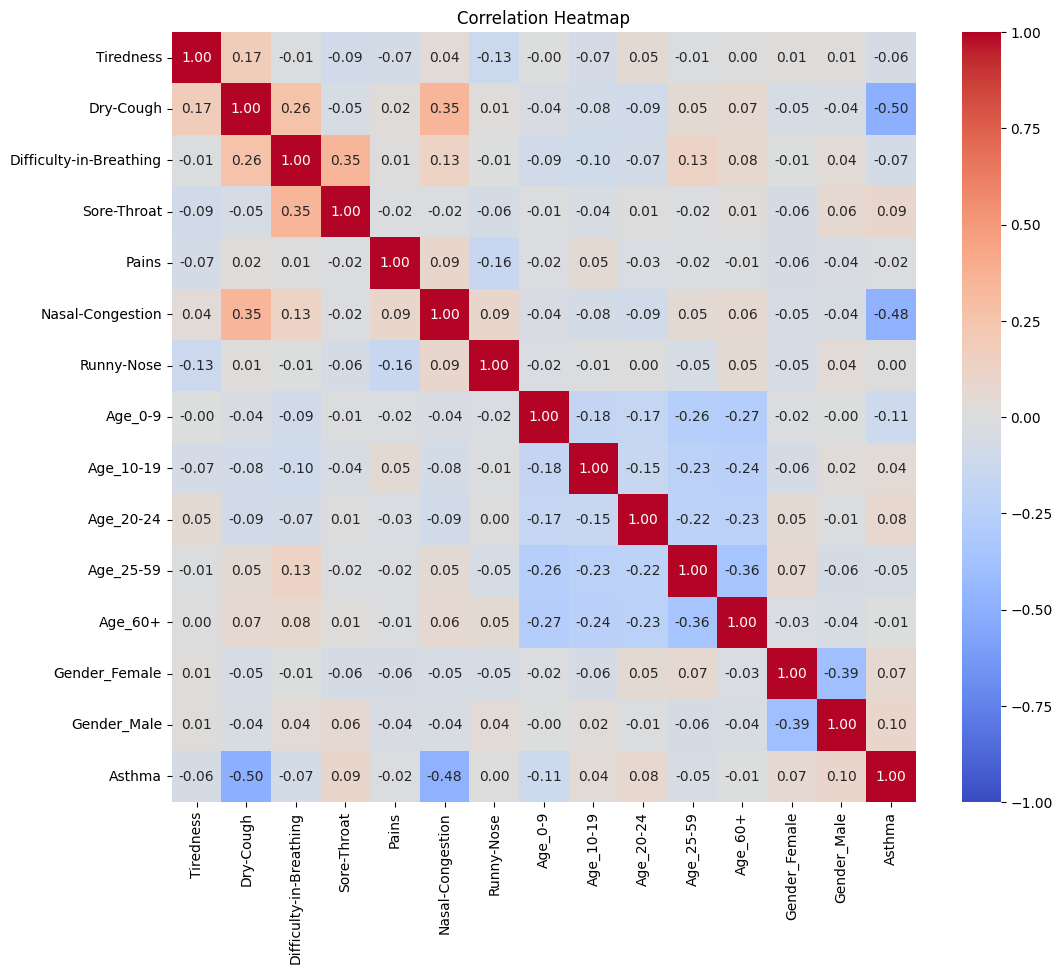

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_melted = pd.melt(df, id_vars=['Asthma'], value_vars=['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose'],
                    var_name='Symptom', value_name='Value')
fig = px.violin(df_melted, x='Symptom', y='Value', color='Asthma', box=True, points='all',
                title='Symptoms Distribution by Asthma Category',
                category_orders={'Asthma': ['None', 'Mild', 'Moderate']},
                labels={'Symptom': 'Symptom', 'Value': 'Value', 'Asthma': 'Asthma Category'})

fig.update_layout(xaxis_title='Symptom', yaxis_title='Value', violinmode='group', showlegend=True)

fig.show()

In [ ]:
age_60_plus = df[df['Age_60+'] == 1]
asthma_counts = age_60_plus['Asthma'].value_counts()
fig = px.pie(names=asthma_counts.index, values=asthma_counts.values, title='Asthma Distribution in Age 60+')
fig.show()

In [ ]:
fig = px.histogram(df, x='Tiredness', color='Asthma',
                   title='Histogram of Tiredness with Asthma Categories',
                   labels={'Tiredness': 'Tiredness Score', 'Asthma': 'Asthma Category'},
                   category_orders={'Asthma': ['None', 'Mild', 'Moderate']},
                   barmode='overlay',
                   opacity=0.8
                  )
fig.show()

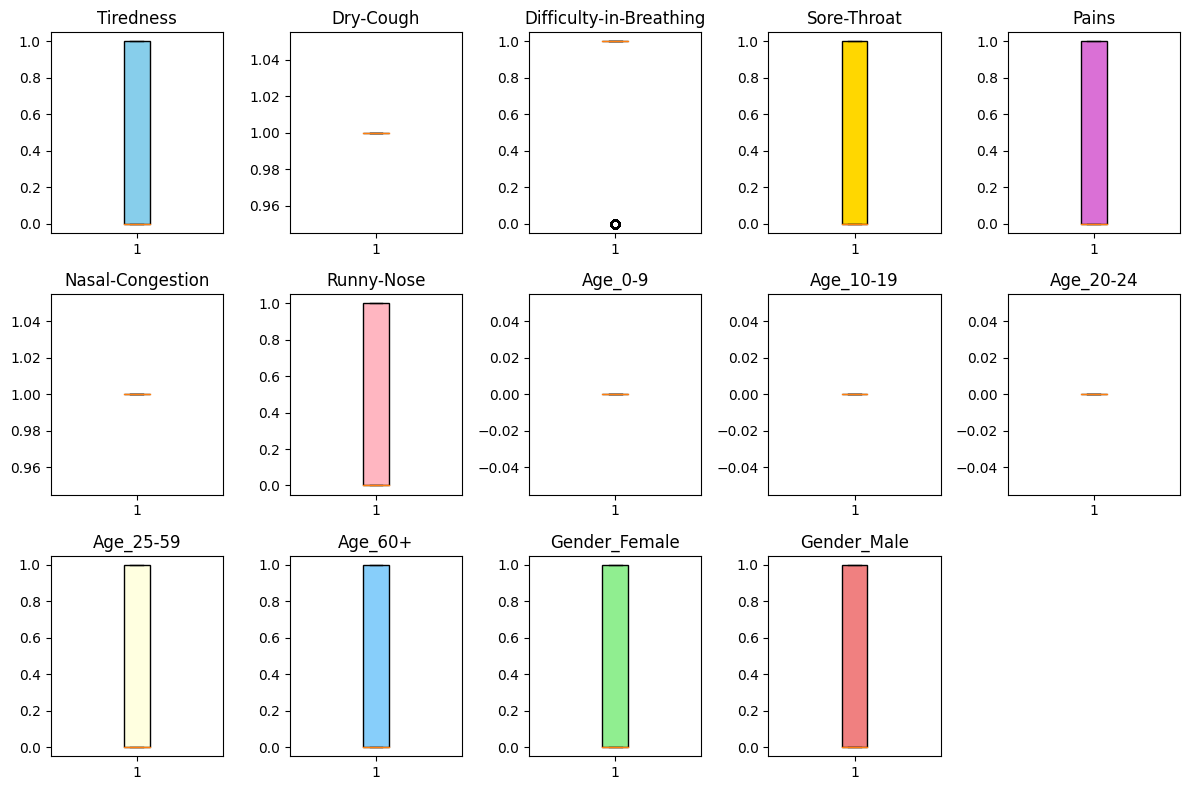

In [ ]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orchid', 'lightcyan', 'lightpink',
          'lightgrey', 'lightsalmon', 'lightseagreen', 'lightyellow', 'lightskyblue',
          'lightgreen', 'lightcoral']

plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    if col != 'Asthma':
        plt.subplot(3, 5, i + 1)
        plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor=colors[i]))
        plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

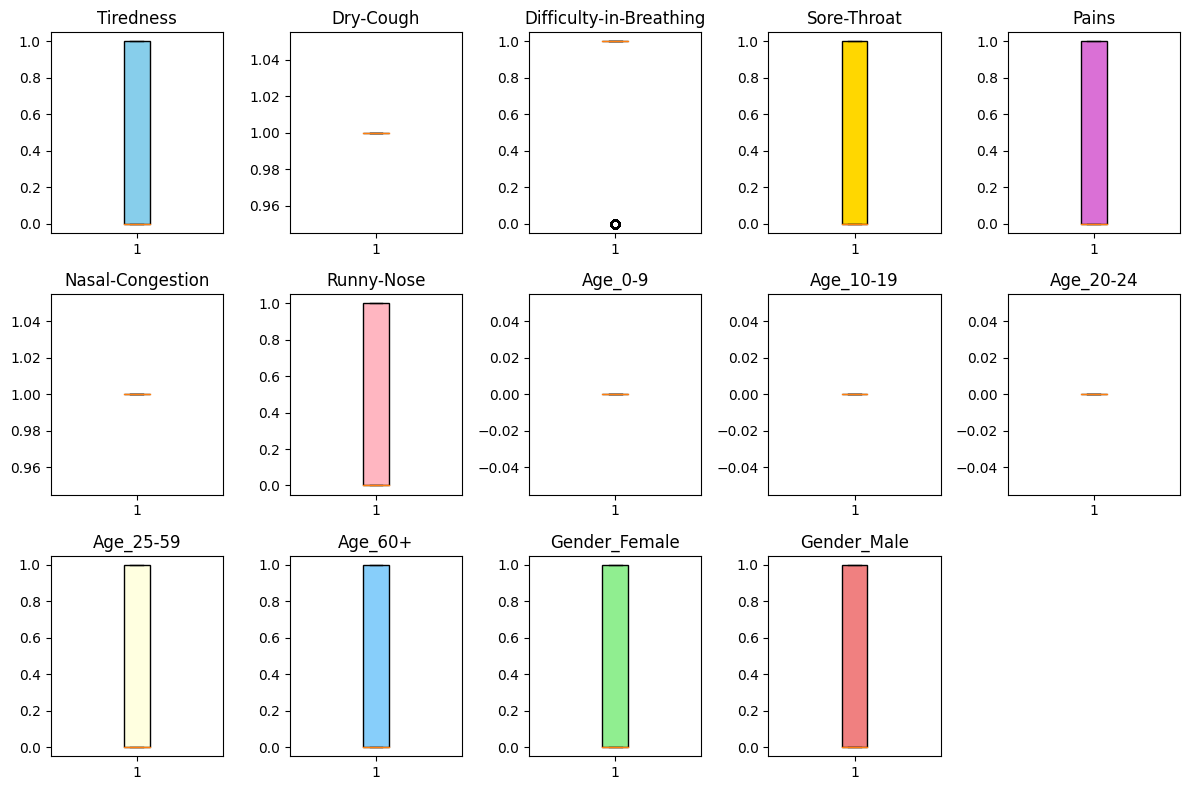

In [ ]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orchid', 'lightcyan', 'lightpink',
          'lightgrey', 'lightsalmon', 'lightseagreen', 'lightyellow', 'lightskyblue',
          'lightgreen', 'lightcoral']

# Plot box plots for each column with custom colors
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    if col != 'Asthma':
        plt.subplot(3, 5, i + 1)  # Adjust subplot grid size as needed
        plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor=colors[i]))
        plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Asthma', axis=1)
y = df['Asthma']
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1783, 14)
Shape of y: (1783,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1426, 14), y_train shape: (1426,)
X_test shape: (357, 14), y_test shape: (357,)


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85

Precision: 0.84
Recall: 0.85
F1-score: 0.84
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.63      0.70        98
           2       0.87      0.97      0.92       226
           3       0.88      0.64      0.74        33

    accuracy                           0.85       357
   macro avg       0.84      0.75      0.78       357
weighted avg       0.84      0.85      0.84       357



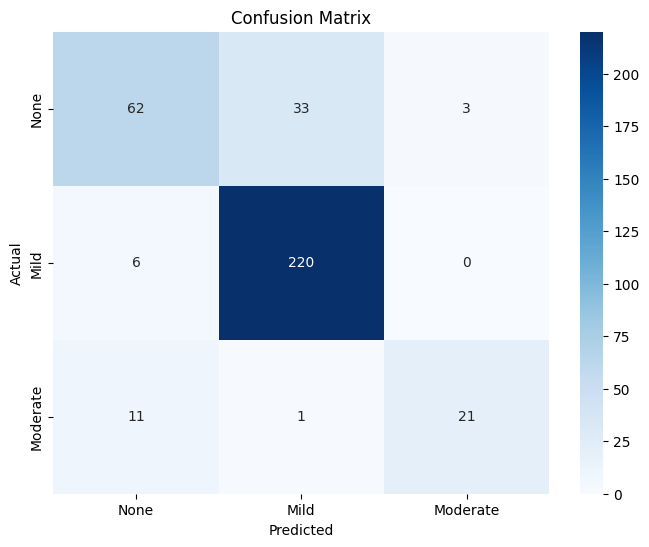

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['None', 'Mild', 'Moderate'],
            yticklabels=['None', 'Mild', 'Moderate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Support Vector Machine (SVM)**

SVM Classifier Metrics:

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-score: 0.83

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.65      0.70        98
           2       0.86      0.98      0.92       226
           3       1.00      0.45      0.62        33

    accuracy                           0.84       357
   macro avg       0.87      0.70      0.75       357
weighted avg       0.84      0.84      0.83       357



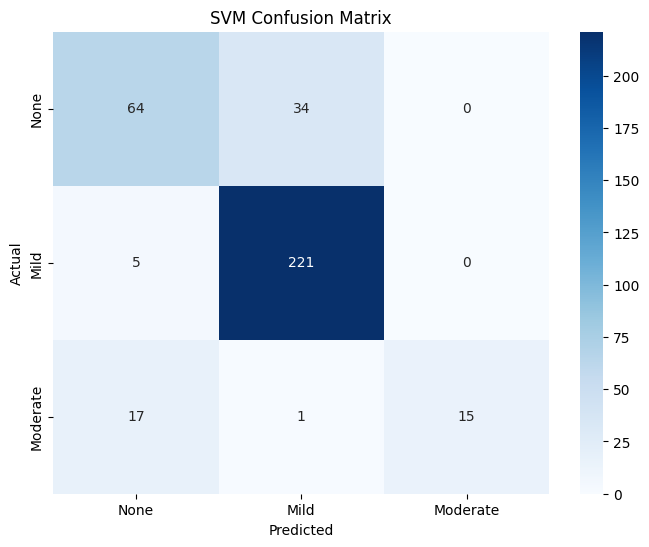

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM Classifier Metrics:\n")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-score: {f1_svm:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['None', 'Mild', 'Moderate'],
            yticklabels=['None', 'Mild', 'Moderate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

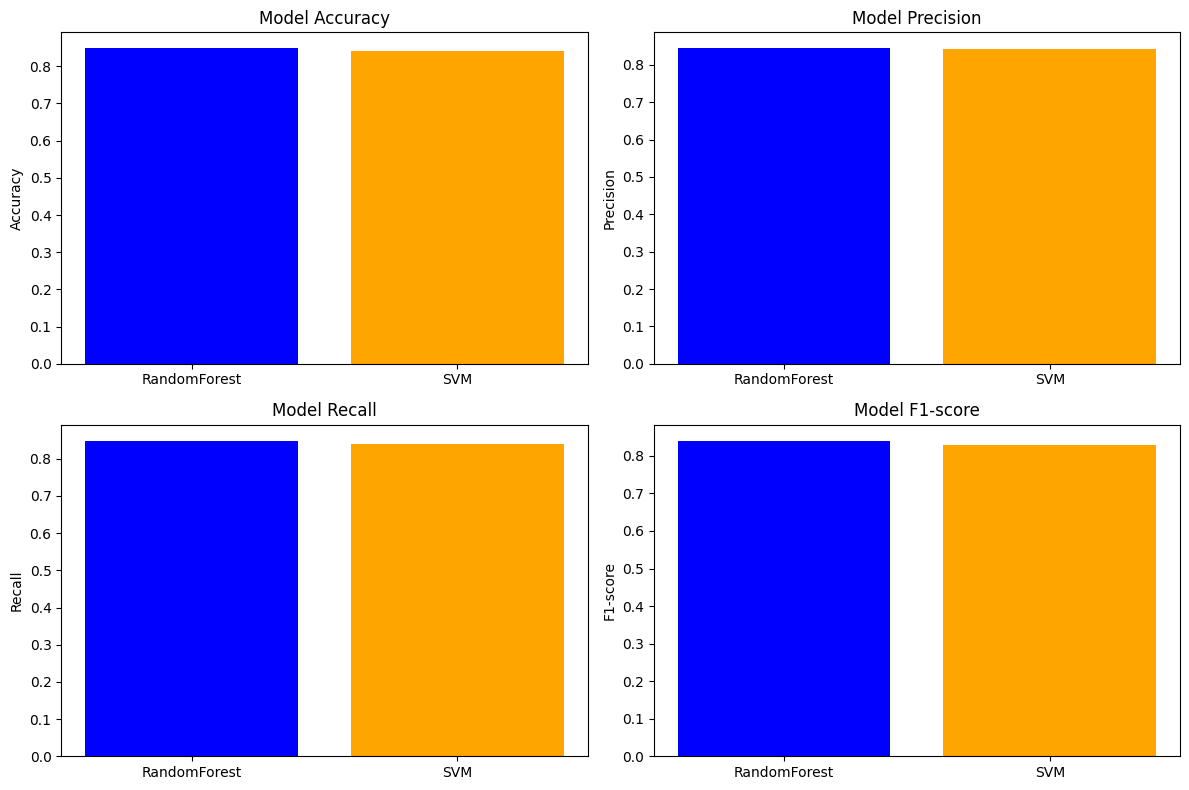

In [ ]:
rf_accuracy = accuracy
rf_precision = precision
rf_recall = recall
rf_f1 = f1

svm_accuracy = accuracy_svm
svm_precision = precision_svm
svm_recall = recall_svm
svm_f1 = f1_svm

models = ['RandomForest', 'SVM']
accuracy_scores = [rf_accuracy, svm_accuracy]
precision_scores = [rf_precision, svm_precision]
recall_scores = [rf_recall, svm_recall]
f1_scores = [rf_f1, svm_f1]

x = range(len(models))

plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.bar(models, accuracy_scores, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')


plt.subplot(2, 2, 2)
plt.bar(models, precision_scores, color=['blue', 'orange'])
plt.ylabel('Precision')
plt.title('Model Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recall_scores, color=['blue', 'orange'])
plt.ylabel('Recall')
plt.title('Model Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color=['blue', 'orange'])
plt.ylabel('F1-score')
plt.title('Model F1-score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Fit the model with training data
model.fit(X_train, y_train)

# Perform 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores_accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
scores_precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision_weighted')
scores_recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall_weighted')
scores_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_weighted')

print(f"Average Accuracy: {np.mean(scores_accuracy):.2f} (± {np.std(scores_accuracy):.2f})")
print(f"Average Precision: {np.mean(scores_precision):.2f} (± {np.std(scores_precision):.2f})")
print(f"Average Recall: {np.mean(scores_recall):.2f} (± {np.std(scores_recall):.2f})")
print(f"Average F1-score: {np.mean(scores_f1):.2f} (± {np.std(scores_f1):.2f})")


Average Accuracy: 0.84 (± 0.02)
Average Precision: 0.84 (± 0.02)
Average Recall: 0.84 (± 0.02)
Average F1-score: 0.83 (± 0.02)


In [ ]:
from joblib import dump
dump(model, 'rf_asthma_model_prediction.pkl')

['rf_asthma_model_prediction.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import joblib
print(joblib.__version__)

1.4.2
